# CeNTREX beamline simulations

This notebook goes through simulations of the trajectories of TlF molecules in the beamline of the CeNTREX experiment.

First we'll import some necessary modules.

In [1]:
from functions import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches


#%%Start clock
start  = time.time()

Next we'll define the geometry of the beamline, i.e. set the positions, sizes and shapes of the relevant apparatus (e.g. field plates, lens) and apertures.

In [2]:
#Beamline parameters (i.e. positions and dimensions of apertures, lenses etc.) (all in meters):
#Measuring z-positions relative to cell aperture

meters_per_inch = 0.0254 #conversion factor from inches to meters

#Cell aperture and zone of freezing dimensions (zone of freezing is the
#region where the molecules "spawn")
cell_aperture = {}
cell_aperture['d'] = meters_per_inch*0.25   #Cell aperture diameter
cell_aperture['z'] = 0

zone_of_freezing = {}                      #Cell aperture position z
zone_of_freezing['z'] = 1*cell_aperture['d']   #position of zone of freezing
zone_of_freezing['d'] = .02                #diameter of zone of freezing

#4K collimator dimensions (cone)
FourK_collimator = {}
FourK_collimator['z_1'] = 0.325*meters_per_inch #4K collimator start z position
FourK_collimator['d_1'] = 0.232*meters_per_inch #4K collimator start diameter
FourK_collimator['z_2'] = FourK_collimator['z_1'] + 1*meters_per_inch #4K collimator end z position
FourK_collimator['d_2'] = 1*meters_per_inch #4K collimator end diameter
FourK_collimator['type'] = 'circle' #Specify cross section type
FourK_collimator['name'] = 'FourK_collimator'

#4K shield dimensions
FourK_shield = {}
FourK_shield['z_1'] = FourK_collimator['z_2']+ meters_per_inch * 0.375 #4K shield z position
FourK_shield['z_2'] = FourK_shield['z_1'] + meters_per_inch * 0.25 #4K shield z position
FourK_shield['d_1'] = meters_per_inch*1 #4K shield aperture diameter
FourK_shield['d_2'] = meters_per_inch*1 #4K shield aperture diameter
FourK_shield['type'] = 'circle' #Specify cross section type
FourK_shield['name'] = 'FourK_shield'

#40K shield dimensions
FortyK_shield = {}
FortyK_shield['z_1'] = FourK_shield['z_2'] + meters_per_inch * 1.25 #40K shield z position
FortyK_shield['z_2'] = FortyK_shield['z_1'] + meters_per_inch * .25 #40K shield z position
FortyK_shield['d_1'] = meters_per_inch*1 #40K shield aperture diameter
FortyK_shield['d_2'] = meters_per_inch*1 #40K shield aperture diameter
FortyK_shield['type'] = 'circle' #Specify cross section type
FortyK_shield['name'] = 'FortyK_shield'


#Beam box exit dimensions
BB_exit = {}
BB_exit['z_1'] = FortyK_shield['z_2'] + meters_per_inch * 2.5 #z position
BB_exit['z_2'] = BB_exit['z_1'] + meters_per_inch * 0.75 #z position
BB_exit['d_1'] = meters_per_inch*4 #diameter of beam box exit
BB_exit['d_2'] = BB_exit['d_1'] #diameter of beam box exit
BB_exit['type'] = 'circle' #Specify cross section type
BB_exit['name'] = 'BB_exit'

#Aperture dimensions (supposed to be 6 mm high and 3 mm wide)
aperture = {}
aperture['z_1'] = BB_exit['z_2'] + 0.03 #Take position of aperture to be 3cm from exit of beamsource for now
aperture['z_2'] = aperture['z_1'] #The thickness to be negligible
aperture['h'] = 6e-3 #Height is 6 mm
aperture['w'] = aperture['h']/2 #Width is 3 mm
aperture['x_1'] = -aperture['w']/2
aperture['x_2'] = aperture['w']/2
aperture['y_1'] = -aperture['h']/2
aperture['y_2'] = aperture['h']/2
aperture['type'] = 'square' #Specify cross section type (called square even if it is actually rectangular)
aperture['name'] = 'aperture'

#Lens dimensions
lens = {}
source_to_lens_distance = BB_exit['z_2'] + meters_per_inch*25   #Distance from cell aperture to star of lens
lens['L'] = 0.6                                                 #length of lens (m)
lens['d_1'] = 1.75*meters_per_inch                              #Lens bore diameter : allowed position within lens before escaping
lens['d_2'] = lens['d_1']                                       #Lens bore diameter : allowed position within lens before escaping
lens['z_1'] = source_to_lens_distance                           #position of lens start
lens['z_2'] = lens['z_1'] + lens['L']                           #Lens end position
lens['dz'] = 0.001                                              #step size within lens
lens['V']  = 30000                                              #lens voltage
lens['electrode_d'] = lens['d_1']                               #electrode diameter
lens['type'] = 'circle'
lens['name'] = 'lens'

#Field plates
field_plate = {}
field_plate['L'] = 3.000                                            #length of interaction region
field_plate['z_1'] = 1.7727                                         #position of interaction region start
field_plate['z_2'] = field_plate['z_1'] + field_plate['L']          #position of interaction region end
field_plate['spacing'] = 0.02                                       #distance between field plates
field_plate['x_1'] = -field_plate['spacing']/2                      #y-position of lower FP
field_plate['x_2'] = +field_plate['spacing']/2                      #y-position of upper FP
field_plate['y_1'] = -5                                             #not sure what the x-limits should be
field_plate['y_2'] = 5                                              #not sure what the x-limits should be
field_plate['type'] = 'fplate'
field_plate['name'] = 'field_plate'


#Detection region
field_plate_to_detection_region_distance = 12.5*meters_per_inch  #Distance from lens to detection region
detection_region = {}
detection_region['L'] = 0.05 #length of detection region
detection_region['z_1'] = field_plate['z_2'] + field_plate_to_detection_region_distance
detection_region['z_2'] = detection_region['z_1'] + detection_region['L']
detection_region['h'] = 0.03 #height of detection region
detection_region['w'] = 0.01 #width of detection region
detection_region['x_1'] = -detection_region['w']/2
detection_region['x_2'] =  detection_region['w']/2
detection_region['y_1'] = -detection_region['h']/2
detection_region['y_2'] = detection_region['h']/2
detection_region['type'] = 'square'
detection_region['name'] = 'detection_region'

#Next we put all of the previously defined structures into another structure called beamline geometry. Make
#sure to enter the beamline elements in the correct order (i.e. 1st element along beamline corresponds to 1st index)
beamline_geometry = {}
beamline_geometry[1] = FourK_collimator
beamline_geometry[2] = FourK_shield
beamline_geometry[3] = FortyK_shield
beamline_geometry[4] = BB_exit
beamline_geometry[5] = aperture
beamline_geometry[6] = lens
beamline_geometry[7] = field_plate
beamline_geometry[8] = detection_region

In [3]:
#Next we define the beam properties. The velocities in the beam are assumed 
#to be described by Gaussians with mean of 200 m/s and std.dev. of 13 m/s for 
#the longitudinal velocity, and  with  for the transverse direction. The intial
#spatial distribution of the beam is taken to be a 1cm diameter circle filled 
#uniformly:
beam = {}
beam['v_z'] = 200 #longitudinal velocity (m/s)
beam['sigma_v_z'] = 13 #spread in longitudinal velocity (m/s)
beam['v_t'] = 0 #transverse velocities should be zero on average but with some spread
beam['sigma_v_x'] = 57 #spread in x velocity (m/s)
beam['sigma_v_y'] = beam['sigma_v_x']; #spread in y velocity (m/s)
beam['d'] = 0.01; #initial diameter of beam

In [4]:
#%% Next we specify the properties of the molecule in question (TlF, need to 
# specify J value)

#Molecule parameters
molecule = {}
molecule['m'] = (204.38+19.00)*1.67e-27 #TlF molecular mass in kg
molecule['J'] = 2 #Rotational quantum number of molecule (m_J = 0 by assumption)

In [8]:
# Now we can run the simulation of the trajectories:
N_molecules = 1e6; #Set number of trajectories to calculate

#Start clock and then call the function that is used to calculate the trajectories
store_trajectories = True;

#Start clock
start  = time.time()

#Call the function that simulates the trajectories
trajectories, counts, r_values, a_values = trajectories_function(zone_of_freezing,beamline_geometry,lens,beam,molecule,
                                                                 N_molecules,store_trajectories);

#%% Stop clock and print out time elapsed
end = time.time()
time_elapsed = end - start
print("Time elapsed = %s" % time_elapsed)




Time elapsed = 15.599016666412354


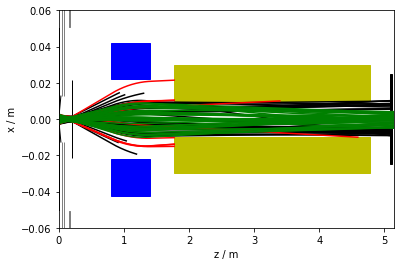

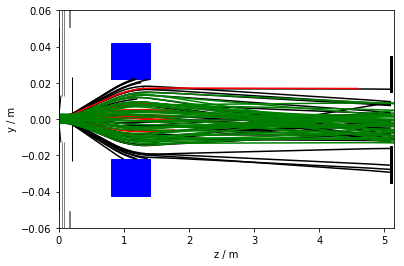

Text(0.5,1,'Accleration of molecules as function of radius within lens')

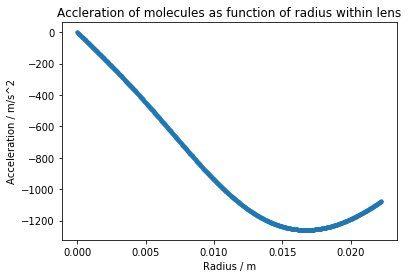

In [11]:
#%%Next we plot the trajectories if number of molecules is small enough
if N_molecules <= 1e6:
    fig1, ax1 = plt.subplots(1)
    #Plot the cell aperture
    plt.plot([0, 0],[cell_aperture['d']/2, 0.05],'k',linewidth = 1)
    plt.plot([0, 0],[-cell_aperture['d']/2, -0.05],'k',linewidth = 1)
    
    #Plot 4K Collimator
    plt.plot([FourK_collimator['z_1'], FourK_collimator['z_2']],[FourK_collimator['d_1']/2, FourK_collimator['d_2']/2],'k',linewidth=1)
    plt.plot([FourK_collimator['z_1'], FourK_collimator['z_2']],[-FourK_collimator['d_1']/2, -FourK_collimator['d_2']/2],'k',linewidth=1)
    
    #Plot 4K shield
    rect1 = patches.Rectangle((FourK_shield['z_1'], FourK_shield['d_1']/2), FourK_shield['z_2']-FourK_shield['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((FourK_shield['z_1'], -FourK_shield['d_1']/2-1), FourK_shield['z_2']-FourK_shield['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Plot 40K shield
    rect1 = patches.Rectangle((FortyK_shield['z_1'], FortyK_shield['d_1']/2), FortyK_shield['z_2']-FortyK_shield['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((FortyK_shield['z_1'], -FortyK_shield['d_1']/2-1), FortyK_shield['z_2']-FortyK_shield['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    
    #Plot Beambox exit shield
    rect1 = patches.Rectangle((BB_exit['z_1'], BB_exit['d_1']/2), BB_exit['z_2']-BB_exit['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((BB_exit['z_1'], -BB_exit['d_1']/2-1), BB_exit['z_2']-BB_exit['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Plot lens
    rect1 = patches.Rectangle((lens['z_1'], lens['d_1']/2), lens['z_2']-lens['z_1'], 0.02, color = 'b')
    rect2 = patches.Rectangle((lens['z_1'], -lens['d_1']/2-0.02), lens['z_2']-lens['z_1'], 0.02,color = 'b')
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Plot aperture
    rect1 = patches.Rectangle((aperture['z_1'], aperture['x_2']), 0.0005, 0.02, color = 'k')
    rect2 = patches.Rectangle((aperture['z_1'], aperture['x_1']-0.02), 0.0005, 0.02,color = 'k')
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Plot field plates
    rect1 = patches.Rectangle((field_plate['z_1'], field_plate['x_2']), field_plate['L'], 0.02, color = 'y')
    rect2 = patches.Rectangle((field_plate['z_1'], field_plate['x_1']-0.02), field_plate['L'], 0.02,color = 'y')
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Plot detection region entrance
    rect1 = patches.Rectangle((detection_region['z_1'], detection_region['x_2']), 0.02, 0.02, color = 'k')
    rect2 = patches.Rectangle((detection_region['z_1'], detection_region['x_1']-0.02), 0.02, 0.02,color = 'k')
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    #Set axes etc
    plt.ylim([-0.06, 0.06])
    #plt.xlim([0, 0.3])
    plt.xlim([0, detection_region['z_2']])
    
    plt.xlabel('z / m')
    plt.ylabel('x / m')
    
    #Now plot the trajectories
    for trajectory in trajectories['lens']:
        plt.plot(trajectory[2,:],trajectory[0,:],'k')
        
    for trajectory in trajectories['detection_region']:
        plt.plot(trajectory[2,:],trajectory[0,:],'k')
    for trajectory in trajectories['field_plate']:
        plt.plot(trajectory[2,:],trajectory[0,:],'r')
    
    for trajectory in trajectories['detected']:
        plt.plot(trajectory[2,:],trajectory[0,:],'g')
        
    
    
    plt.show()
    
    #Next plot the trajectories in yz-plane
    fig2, ax2 = plt.subplots()
    #Plot the cell aperture
    plt.plot([0, 0],[cell_aperture['d']/2, 0.05],'k',linewidth = 1)
    plt.plot([0, 0],[-cell_aperture['d']/2, -0.05],'k',linewidth = 1)
    
    #Plot 4K Collimator
    plt.plot([FourK_collimator['z_1'], FourK_collimator['z_2']],[FourK_collimator['d_1']/2, FourK_collimator['d_2']/2],'k',linewidth=1)
    plt.plot([FourK_collimator['z_1'], FourK_collimator['z_2']],[-FourK_collimator['d_1']/2, -FourK_collimator['d_2']/2],'k',linewidth=1)
    
    #Plot 4K shield
    rect1 = patches.Rectangle((FourK_shield['z_1'], FourK_shield['d_1']/2), FourK_shield['z_2']-FourK_shield['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((FourK_shield['z_1'], -FourK_shield['d_1']/2-1), FourK_shield['z_2']-FourK_shield['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Plot 40K shield
    rect1 = patches.Rectangle((FortyK_shield['z_1'], FortyK_shield['d_1']/2), FortyK_shield['z_2']-FortyK_shield['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((FortyK_shield['z_1'], -FortyK_shield['d_1']/2-1), FortyK_shield['z_2']-FortyK_shield['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    
    #Plot Beambox exit shield
    rect1 = patches.Rectangle((BB_exit['z_1'], BB_exit['d_1']/2), BB_exit['z_2']-BB_exit['z_1'], 1, color = (.5, .5,.5))
    rect2 = patches.Rectangle((BB_exit['z_1'], -BB_exit['d_1']/2-1), BB_exit['z_2']-BB_exit['z_1'], 1,color = (0.5, 0.5, 0.5))
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Plot lens
    rect1 = patches.Rectangle((lens['z_1'], lens['d_1']/2), lens['z_2']-lens['z_1'], 0.02, color = 'b')
    rect2 = patches.Rectangle((lens['z_1'], -lens['d_1']/2-0.02), lens['z_2']-lens['z_1'], 0.02,color = 'b')
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Plot aperture
    rect1 = patches.Rectangle((aperture['z_1'], aperture['y_2']), 0.0005, 0.02, color = 'k')
    rect2 = patches.Rectangle((aperture['z_1'], aperture['y_1']-0.02), 0.0005, 0.02,color = 'k')
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Plot field plates
    rect1 = patches.Rectangle((field_plate['z_1'], field_plate['y_2']), field_plate['L'], 0.02, color = 'y')
    rect2 = patches.Rectangle((field_plate['z_1'], field_plate['y_1']-0.02), field_plate['L'], 0.02,color = 'y')
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Plot detection region entrance
    rect1 = patches.Rectangle((detection_region['z_1'], detection_region['y_2']), 0.02, 0.02, color = 'k')
    rect2 = patches.Rectangle((detection_region['z_1'], detection_region['y_1']-0.02), 0.02, 0.02,color = 'k')
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)
    
    #Set axes etc
    plt.ylim([-0.06, 0.06])
    #plt.xlim([0, 0.3])
    plt.xlim([0, detection_region['z_2']])
    
    plt.xlabel('z / m')
    plt.ylabel('y / m')
    
    
    
    
    #Plot trajectories    
    for trajectory in trajectories['lens']:
        plt.plot(trajectory[2,:],trajectory[1,:],'k')
        
    for trajectory in trajectories['detection_region']:
        plt.plot(trajectory[2,:],trajectory[1,:],'k')
        
    for trajectory in trajectories['field_plate']:
        plt.plot(trajectory[2,:],trajectory[1,:],'r')    
    for trajectory in trajectories['detected']:
        plt.plot(trajectory[2,:],trajectory[1,:],'g')
        
        
    plt.show()
    
    


#Plot acceleration vs r:
plt.figure()
plt.plot(r_values,a_values,':.')
plt.xlabel('Radius / m')
plt.ylabel('Acceleration / m/s^2')
plt.title('Accleration of molecules as function of radius within lens')

In [ ]:
#Also plot the initial distribution in positions as a check
#Note: this is not the actual initial distribution used above, just another
#set of numbers generated from the same pdfs
size = int(1e8)
theta = np.random.rand(1,size)*2*np.pi
r = (np.sqrt(np.random.rand(1,size)) 
    * zone_of_freezing['d']/2)

x_ini = np.zeros((size,3))
#Store the initial positions in an array. Each new row of the array
#corresponds to a new molecule. Starting z-position is set later.
x_ini[:,0] = r*np.cos(theta)
x_ini[:,1] = r*np.sin(theta)

plt.figure()
plt.hist2d(x_ini[:,0],x_ini[:,1], bins = 200);
plt.colorbar()
plt.show()

